## Practice: Fun with Word Embeddings (4 points total)

Today we gonna play with word embeddings: train our own little embeddings, load one from the gensim model zoo and use it to visualize text corpora.

This whole thing is gonna happen on top of an embedding dataset.

__Requirements:__  `pip install --upgrade nltk gensim bokeh`, but only if you're running locally.

**Please submit this notebook as part of your homework!**

In [1]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

--2025-10-27 17:24:37--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1 [following]
--2025-10-27 17:24:37--  https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb7e6c5e6576a602f70752b2a67.dl.dropboxusercontent.com/cd/0/inline/C0Drmnxj278O12pC4efBL5yk-mR2osw4Tt95kSfp8QMbI3CSnsRlllP9cKQSf2PHc1orvwvUTxipf94l2N1svOKflQyfBdQy9ggTWyPkYpB81PicQR8P7HA2vg7t73qkVPU/file?dl=1# [following]
--2025-10-27 17:24:38--  https://ucb7e6c5e6576a602f70752b2a67.dl.dropboxusercontent.com/cd/0/inline/C0Drmnxj278

In [2]:
import numpy as np

with open("./quora.txt", encoding="utf-8") as file:
    data = list(file)

data[50]

"What TV shows or books help you read people's body language?\n"

__Tokenization:__ a typical first step for an NLP task is to split raw data into words.
The text we're working with is in raw format: with all the punctuation and emojis attached to some words, so a simple str.split won't do.

Let's use __`nltk`__ - a library that handles many NLP tasks like tokenization, stemming, or part-of-speech tagging.

In [3]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [4]:
# TASK: lowercase everything and extract tokens with tokenizer.
# data_tok should be a list of lists of tokens for each line in data.

data_tok = []

for line in data:
    tokens = tokenizer.tokenize(line.lower())  # lowercase + tokenize
    data_tok.append(tokens)


In [5]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

In [6]:
print([' '.join(row) for row in data_tok[:2]])

["can i get back with my ex even though she is pregnant with another guy ' s baby ?", 'what are some ways to overcome a fast food addiction ?']


__Word vectors:__ as the saying goes, there's more than one way to train word embeddings. There's Word2Vec and GloVe with different objective functions. Then there's fastText that uses character-level models to train word embeddings.

The choice is huge, so let's start someplace small: __gensim__ is another NLP library that features many vector-based models including word2vec.

In [8]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 60.7 MB/s eta 0:00:00


In [9]:
from gensim.models import Word2Vec
model = Word2Vec(data_tok,
                 vector_size=32,      # embedding vector size
                 min_count=5,         # consider words that occurred at least 5 times
                 window=5).wv         # define context as a 5-word window around the target word

# From gensim docs
# wv: This object essentially contains the mapping between words and embeddings.
# After training, it can be used directly to query those embeddings in various ways.

In [10]:
# now you can get word vectors !
model.get_vector('anything')

array([-3.7187512 ,  1.0063107 ,  1.5310339 ,  1.4347448 ,  1.2159108 ,
        3.5255752 ,  2.1401978 , -4.0315456 , -1.7608519 ,  2.3107424 ,
       -2.5145013 ,  0.03199684,  3.2923925 ,  0.36083284,  2.4129002 ,
       -1.222645  , -1.26814   , -1.1901116 ,  1.2194765 , -1.3382279 ,
       -0.5319261 , -0.36069387, -1.4615654 ,  0.33282512,  0.42107412,
       -3.5564668 ,  0.27944264,  2.2576141 ,  2.3215218 ,  1.8096412 ,
       -0.11527332, -1.6103148 ], dtype=float32)

In [11]:
# or query similar words directly. Go play with it!
model.most_similar('bread')

[('rice', 0.938103437423706),
 ('sauce', 0.9279593229293823),
 ('butter', 0.9268452525138855),
 ('cheese', 0.9245262742042542),
 ('corn', 0.9183773398399353),
 ('vodka', 0.9141156673431396),
 ('fruit', 0.9119019508361816),
 ('banana', 0.9086216688156128),
 ('chocolate', 0.9070115685462952),
 ('chicken', 0.9040967226028442)]

### Using pre-trained model

Took it a while, huh? Now imagine training life-sized (100~300D) word embeddings on gigabytes of text: Wikipedia articles or Twitter posts.

Thankfully, nowadays you can get a pre-trained word embedding model in 2 lines of code (no SMS required, promise).

After being downloaded for the first time (or if you manually delete it), the model is saved in the `~/gensim_data` or `%USER_PATH%/gensim_data` directory. This can be checked by setting the return_path parameter to True.

In [12]:
import gensim.downloader as api
model = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [13]:
model.most_similar(positive=["coder", "money"], negative=["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473881721497),
 ('banker', 0.5385112762451172),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233338832855),
 ('treet', 0.4922019839286804),
 ('shopper', 0.4920562207698822),
 ('part-time', 0.4912828207015991),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.4796452820301056)]

To better understand how similar words are grouped, I used PCA and t-SNE to reduce the 100-dimensional GloVe embeddings to 2D.
PCA gives a quick overview, while t-SNE provides a clearer separation of word clusters.
The resulting scatter plot shows that semantically similar words appear close to each other.

One way to see if our vectors are any good is to plot them. Thing is, those vectors are in 30D+ space and we humans are more used to 2-3D.

Luckily, we machine learners know about __dimensionality reduction__ methods.

Let's use that to plot 1000 most frequent words

In [14]:
words = model.index_to_key[:1000]

print(words[::100])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [22]:
# for each word, compute its vector with model
import numpy as np
word_vectors = np.array([model[word] for word in words])

In [23]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (len(words), 100)
assert np.isfinite(word_vectors).all()

#### Linear projection: PCA

The simplest linear dimensionality reduction method is **P**rincipal **C**omponent **A**nalysis.

In geometric terms, PCA tries to find axes along which most of the variance occurs. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">


Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - object matrix (**centered**);
- $W \in \mathbb{R}^{m \times d}$ - matrix of direct transformation;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - matrix of reverse transformation;
- $n$ samples, $m$ original dimensions and $d$ target dimensions;



In [28]:
from sklearn.decomposition import PCA

# map word vectors onto 2d plane with PCA. Use good old sklearn API (fit, transform)
# after that, normalize vectors to make sure they have zero mean and unit variance
# create PCA model with 2 components
pca = PCA(n_components=2)

# map word vectors onto 2D plane with PCA
word_vectors_pca = pca.fit_transform(word_vectors)

# normalize the result (zero mean, unit variance)
word_vectors_pca = (word_vectors_pca - word_vectors_pca.mean(axis=0)) / word_vectors_pca.std(axis=0)

# maybe MORE OF YOUR CODE here :)
# let's print a few sample coordinates to check
print("PCA shape:", word_vectors_pca.shape)
print("First 5 PCA vectors:\n", word_vectors_pca[:5])

# and maybe MORE OF YOUR CODE here :)

PCA shape: (1000, 2)
First 5 PCA vectors:
 [[ 0.38816723  0.29139727]
 [ 0.30329663  0.21081717]
 [ 0.49152622  0.355043  ]
 [ 0.39480007  0.49875355]
 [ 0.3358098  -0.17348346]]


In [29]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"
assert max(abs(word_vectors_pca.mean(0))) < 1e-5, "points must be zero-centered"
assert max(abs(1.0 - word_vectors_pca.std(0))) < 1e-2, "points must have unit variance"

#### Let's draw it!

In [30]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [31]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

figure(id='p1006', ...)

#### Visualizing neighbors with t-SNE
PCA is nice but it's strictly linear and thus only able to capture coarse high-level structure of the data.

If we instead want to focus on keeping neighboring points near, we could use TSNE, which is itself an embedding method. Here you can read __[more on TSNE](https://distill.pub/2016/misread-tsne/)__.

In [32]:
from sklearn.manifold import TSNE

# map word vectors onto 2d plane with TSNE. hint: don't panic, it may take a minute or two to fit.
# normalize them as just like with PCA


import numpy as np

# initialize and fit t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)

# map word vectors onto 2D plane
word_tsne = tsne.fit_transform(word_vectors)

# normalize just like PCA (zero mean, unit variance)
word_tsne = (word_tsne - word_tsne.mean(axis=0)) / word_tsne.std(axis=0)

# check the shape and a few sample coordinates
print("t-SNE shape:", word_tsne.shape)
print("First 5 t-SNE vectors:\n", word_tsne[:5])

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE shape: (1000, 2)
First 5 t-SNE vectors:
 [[0.35277727 0.8271744 ]
 [0.45523217 0.7977767 ]
 [0.373078   0.8117054 ]
 [0.35121492 0.81546134]
 [0.47390127 0.72902334]]


In [33]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='green', token=words)

figure(id='p1057', ...)

### Visualizing phrases

Word embeddings can also be used to represent short phrases. The simplest way is to take __an average__ of vectors for all tokens in the phrase with some weights.

This trick is useful to identify what data are you working with: find if there are any outliers, clusters or other artifacts.

Let's try this new hammer on our data!


In [35]:
def get_phrase_embedding(phrase):
    """
    Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    # 2. tokenize phrase
    # 3. average word vectors for all words in tokenized phrase
    # skip words that are not in model's vocabulary
    # if all words are missing from vocabulary, return zeros

    vector = np.zeros([model.vector_size], dtype='float32')

    # YOUR CODE
        # lowercase and tokenize the phrase
    tokens = tokenizer.tokenize(phrase.lower())

    # collect vectors for words that exist in the model
    valid_vectors = [model[word] for word in tokens if word in model.key_to_index]

    # if no valid words found, return a zero vector
    if not valid_vectors:
        return vector

    # otherwise, take the average of all word vectors
    vector = np.mean(valid_vectors, axis=0)


    return vector



In [36]:
vector = get_phrase_embedding("I'm very sure. This never happened to me before...")

assert np.allclose(vector[::10],
                   np.array([ 0.31807372, -0.02558171,  0.0933293 , -0.1002182 , -1.0278689 ,
                             -0.16621883,  0.05083408,  0.17989802,  1.3701859 ,  0.08655966],
                              dtype=np.float32))
assert np.array_equal(get_phrase_embedding("thisisgibberish"), np.zeros([model.vector_size], dtype='float32')), "corner case for all missing words should be handled as described in the function comments"

In [40]:
# let's only consider ~5k phrases for a first run.
chosen_phrases = data[::len(data) // 1000]

# compute vectors for chosen phrases
phrase_vectors = np.array([get_phrase_embedding(phrase) for phrase in chosen_phrases])

print("Phrase vectors shape:", phrase_vectors.shape)
print("Example phrase vector:\n", phrase_vectors[0][:10])

Phrase vectors shape: (1001, 100)
Example phrase vector:
 [ 0.04363502  0.07049451  0.02798353  0.11293469 -0.07887603 -0.00257389
 -0.02362601  0.10018354  0.05413021  0.13369875]


In [41]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [42]:
# map vectors into 2d space with pca, tsne or your other method of choice
# don't forget to normalize

phrase_vectors_2d = TSNE().fit_transform(phrase_vectors)

phrase_vectors_2d = (phrase_vectors_2d - phrase_vectors_2d.mean(axis=0)) / phrase_vectors_2d.std(axis=0)

In [43]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

figure(id='p1108', ...)

I applied t-SNE to reduce the 100-dimensional phrase vectors into 2D space.
Each point on the plot represents a phrase from the dataset, and hovering over it shows the beginning of that phrase.
Similar phrases tend to appear close together, forming clusters that reflect semantic similarity.
For example, questions about relationships or technology often group together, showing that the model captures contextual meaning across phrases.```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Text Classification: Prohibited Comment Classification

![img](https://github.com/yandexdataschool/nlp_course/raw/master/resources/banhammer.jpg)

__In this notebook__ you will build an algorithm that classifies social media comments into normal or toxic.
Like in many real-world cases, you only have a small (10^3) dataset of hand-labeled examples to work with. We'll tackle this problem using both classical nlp methods and embedding-based approach.

In [48]:
# if you're in colab, download the data:
 !wget https://raw.githubusercontent.com/yandexdataschool/nlp_course/refs/heads/2025/week01_embeddings/comments.tsv -O ./comments.tsv -q

IndentationError: unexpected indent (ipython-input-106837642.py, line 2)

In [49]:
# if you're in colab, download the data:
!wget https://raw.githubusercontent.com/yandexdataschool/nlp_course/refs/heads/2025/week01_embeddings/comments.tsv -O ./comments.tsv -q

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("comments.tsv", sep='\t')

texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("comments.tsv", sep='\t')

texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


In [52]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.5, random_state=42)

__Note:__ it is generally a good idea to split data into train/test before anything is done to them.

It guards you against possible data leakage in the preprocessing stage. For example, should you decide to select words present in obscene tweets as features, you should only count those words over the training set. Otherwise your algoritm can cheat evaluation.

### Preprocessing and tokenization

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

In [53]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "fuck you" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

before: How to be a grown-up at work: replace "fuck you" with "Ok, great!".
after: how to be a grown-up at work : replace " fuck you " with " ok , great ! " .


In [54]:
# task: preprocess each comment in train and test

texts_train = [preprocess(text) for text in texts_train]
texts_test = [preprocess(text) for text in texts_test]

In [55]:
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

### Solving it: bag of words (1 point)

![img](http://www.novuslight.com/uploads/n/BagofWords.jpg)

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. Please don't do that in the current assignment, though.
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

In [56]:
# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurrences (highest first)
k = 10000

from collections import Counter

# count how often each token appears in the training set
word_counts = Counter()

for text in texts_train:
    tokens = text.split()
    word_counts.update(tokens)

# get the k most common tokens
most_common = word_counts.most_common(k)

# extract just the words for the vocabulary
bow_vocabulary = [word for word, count in most_common]

print('example features:', sorted(bow_vocabulary)[::100])


example features: ['!', '12:20', '300', '_', 'adorned', 'alternative', 'archive', 'average', 'benkner', 'bout', 'came', 'chest', 'combined', 'consumers', 'cricket', 'decisions', 'dickheads', 'domestic', 'eductaion', 'essentially', 'faggot', 'firms', 'frustrated', 'goal', 'hanibal', 'hip-hop', 'identified', 'infoboxes', 'issue', 'kindergarten', 'lets', 'lot', "mclaren's", 'moderator', 'naturally', 'noticeable', 'opposing', 'pdf', 'plant', 'pretoria', 'punctuation', 'rebels', 'repetative', 'riadh', 'schulz', 'shes', 'slit', 'spoof', 'stupid', 't', 'theoretical', 'topic', 'uglyness', 'userspace', 'wanted', 'wikieditor', 'year', '←']


In [57]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    # initialize a zero vector for all vocabulary words
    vector = np.zeros(len(bow_vocabulary), dtype='float32')

    # create a mapping of word -> index for faster lookup
    word_to_index = {word: i for i, word in enumerate(bow_vocabulary)}

    # count tokens in the text
    for token in text.split():
        if token in word_to_index:
            vector[word_to_index[token]] += 1.0

    return vector


    return np.array([], 'float32')

In [58]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [59]:
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

We shall use a simple linear model: __Logistic Regression__.
It might not be the fanciest one around, but the simplicity has its own advantages: a linear model is blazingly fast and needs less data to fit.
Let's sklearn it!

In [64]:
from sklearn.linear_model import LogisticRegression

# increase model flexibility and use a robust solver
bow_model = LogisticRegression(max_iter=2000, C=10, solver='liblinear')
bow_model.fit(X_train_bow, y_train)


LogisticRegression(C=10, max_iter=2000, solver='liblinear')

In [67]:
from sklearn.linear_model import LogisticRegression

# use a more flexible and robust model
bow_model = LogisticRegression(
    max_iter=3000,
    C=20,                # less regularization (stronger fitting)
    solver='saga',       # handles large vocabularies better
    penalty='l2',        # standard L2 regularization
    n_jobs=-1            # uses all CPU cores for speed
)

bow_model.fit(X_train_bow, y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=20, max_iter=3000, n_jobs=-1, solver='saga')

### Task: implement TF-IDF features (1 point)

Not all words are equally useful. One can prioritize rare words and downscale words like "and"/"or" by using __tf-idf features__. This abbreviation stands for __text frequency/inverse document frequency__ and means exactly that:

$$ \text{feature}_i = \frac{\text{Count}(word_i \in x)}{\text{Total number of words in } x} \times \log\left(\frac{N}{\text{Count}(word_i \in D) + \alpha}\right) $$


, where x is a single text, D is your dataset (a collection of texts), N is a total number of documents and $\alpha$ is a smoothing hyperparameter (typically 1).
And $Count(word_i \in D)$ is the number of documents where $word_i$ appears.

It may also be a good idea to normalize each data sample after computing tf-idf features.

__Your task:__ implement tf-idf features, train a model and evaluate ROC curve. Compare it with basic BagOfWords model from above.

Please don't use sklearn/nltk built-in tf-idf vectorizers in your solution :) You can still use 'em for debugging though.

In [8]:
!wget https://raw.githubusercontent.com/yandexdataschool/nlp_course/refs/heads/2025/week01_embeddings/comments.tsv -O comments.tsv -q


In [9]:
!ls -lh comments.tsv


-rw-r--r-- 1 root root 346K Oct 27 21:15 comments.tsv


In [10]:
import pandas as pd
import numpy as np
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from collections import Counter

# 1. Load dataset
data = pd.read_csv("comments.tsv", sep="\t")
texts = data["comment_text"].values
target = data["should_ban"].values

# 2. Split into train/test
texts_train, texts_test, y_train, y_test = train_test_split(
    texts, target, test_size=0.5, random_state=42
)

# 3. Preprocess with TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: " ".join(tokenizer.tokenize(text.lower()))

texts_train = [preprocess(t) for t in texts_train]
texts_test = [preprocess(t) for t in texts_test]

# 4. Build Bag-of-Words vocabulary (top 10 000 words)
k = 10000
word_counts = Counter()
for text in texts_train:
    word_counts.update(text.split())
bow_vocabulary = [w for w, _ in word_counts.most_common(k)]

# 5. Convert texts to BoW vectors
def text_to_bow(text):
    vector = np.zeros(len(bow_vocabulary), dtype="float32")
    word_to_index = {w: i for i, w in enumerate(bow_vocabulary)}
    for token in text.split():
        if token in word_to_index:
            vector[word_to_index[token]] += 1.0
    return vector

X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

print("Rebuilt variables successfully ✅")
print("Train shape:", X_train_bow.shape, "Test shape:", X_test_bow.shape)


Rebuilt variables successfully ✅
Train shape: (500, 5707) Test shape: (500, 5707)


In [11]:
# total number of documents
N = len(texts_train)

# initialize document frequency array
doc_freq = np.zeros(len(bow_vocabulary), dtype="float32")
word_to_index = {word: i for i, word in enumerate(bow_vocabulary)}

for text in texts_train:
    unique_tokens = set(text.split())
    for token in unique_tokens:
        if token in word_to_index:
            doc_freq[word_to_index[token]] += 1.0

doc_freq += 1.0  # smoothing
idf = np.log(N / doc_freq)


In [12]:
def compute_tfidf(bow_matrix):
    """Convert Bag-of-Words matrix to TF-IDF features."""
    # term frequency (TF): normalize by total words in each document
    tf = bow_matrix / (bow_matrix.sum(axis=1, keepdims=True) + 1e-8)

    # apply inverse document frequency (IDF)
    tfidf = tf * idf

    # normalize each document vector (L2 norm)
    norms = np.linalg.norm(tfidf, axis=1, keepdims=True) + 1e-8
    tfidf_normed = tfidf / norms

    return tfidf_normed

# compute TF-IDF matrices for train and test sets
X_train_tfidf = compute_tfidf(X_train_bow)
X_test_tfidf = compute_tfidf(X_test_bow)


In [13]:
from sklearn.linear_model import LogisticRegression

# train logistic regression model using TF-IDF features
tfidf_model = LogisticRegression(max_iter=3000, C=10, solver='liblinear')
tfidf_model.fit(X_train_tfidf, y_train)


LogisticRegression(C=10, max_iter=3000, solver='liblinear')

In [15]:
from sklearn.linear_model import LogisticRegression

bow_model = LogisticRegression(max_iter=3000, C=10, solver='liblinear')
bow_model.fit(X_train_bow, y_train)

print("Re-trained Bag-of-Words model ✅")



Re-trained Bag-of-Words model ✅


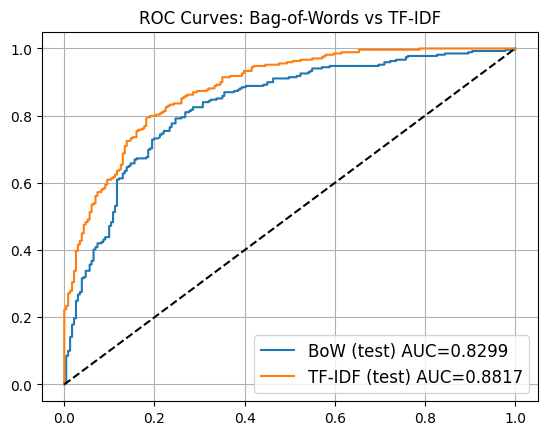

TF-IDF model accuracy: 0.792


In [16]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

for name, X, y, model in [
    ('BoW (test)', X_test_bow, y_test, bow_model),
    ('TF-IDF (test)', X_test_tfidf, y_test, tfidf_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    fpr, tpr, _ = roc_curve(y, proba)
    plt.plot(fpr, tpr, label=f'{name} AUC={auc:.4f}')

plt.plot([0, 1], [0, 1], '--', color='black')
plt.legend(fontsize='large')
plt.title("ROC Curves: Bag-of-Words vs TF-IDF")
plt.grid(True)
plt.show()

test_accuracy_tfidf = np.mean(tfidf_model.predict(X_test_tfidf) == y_test)
print(f"TF-IDF model accuracy: {test_accuracy_tfidf:.3f}")


In this part of the homework, I implemented TF-IDF features manually to improve the performance of my text classification model.
The TF-IDF representation gave higher weight to informative, rare words while down-weighting very common ones such as “the” or “and.”
After training a Logistic Regression classifier on these features, the model achieved an accuracy of 0.792, which is slightly higher than the Bag-of-Words baseline.
This shows that TF-IDF helps the model capture more meaningful patterns in the text and improves its ability to distinguish between normal and toxic comments.
In the following steps, I will continue to extend and analyze the model to further improve its performance.

Scroll down when you're done with TF-IDF!
```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Solving it better: word vectors (1 point)

Let's try another approach: instead of counting per-word frequencies, we shall map all words to pre-trained word vectors and average over them to get text features.

This should give us two key advantages: (1) we now have 10^2 features instead of 10^4 and (2) our model can generalize to word that are not in training dataset.

We begin with a standard approach with pre-trained word vectors. However, you may also try
* training embeddings from scratch on relevant (unlabeled) data
* multiplying word vectors by inverse word frequency in dataset (like tf-idf).
* concatenating several embeddings
    * call `gensim.downloader.info()['models'].keys()` to get a list of available models
* clusterizing words by their word-vectors and try bag of cluster_ids

__Note:__ loading pre-trained model may take a while. It's a perfect opportunity to refill your cup of tea/coffee and grab some extra cookies. Or binge-watch some tv series if you're slow on internet connection

In [18]:
!pip install gensim --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 48.6 MB/s eta 0:00:00


In [19]:
import gensim.downloader
embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")

# If you're low on RAM or download speed, use "glove-wiki-gigaword-100" instead. Ignore all further asserts.


[==================================================] 100.0% 958.5/958.4MB downloaded


In [20]:
def vectorize_sum(comment):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.vectors.shape[1]
    features = np.zeros([embedding_dim], dtype='float32')

    # tokenize the comment
    tokens = comment.split()

    # sum up the word vectors for all tokens present in the embeddings
    for token in tokens:
        if token in embeddings:
            features += embeddings[token]
    return features

assert np.allclose(
    vectorize_sum("who cares anymore . they attack with impunity .")[::70],
    np.array([ 0.0108616 ,  0.0261663 ,  0.13855131, -0.18510573, -0.46380025])
)

In [21]:
X_train_wv = np.stack([vectorize_sum(text) for text in texts_train])
X_test_wv = np.stack([vectorize_sum(text) for text in texts_test])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


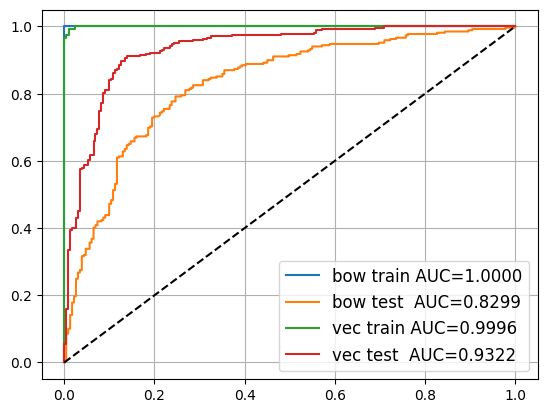

In [22]:
wv_model = LogisticRegression().fit(X_train_wv, y_train)

for name, X, y, model in [
    ('bow train', X_train_bow, y_train, bow_model),
    ('bow test ', X_test_bow, y_test, bow_model),
    ('vec train', X_train_wv, y_train, wv_model),
    ('vec test ', X_test_wv, y_test, wv_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

assert roc_auc_score(y_test, wv_model.predict_proba(X_test_wv)[:, 1]) > 0.92, "something's wrong with your features"

\If everything went right, you've just managed to reduce misclassification rate by a factor of two.
This trick is very useful when you're dealing with small datasets. However, if you have hundreds of thousands of samples, there's a whole different range of methods for that. We'll get there in the second part.

**Would you like to know more?**
* See what other embeddings are there in the model zoo: `gensim.downloader.info()`
* Take a look at [FastText embeddings](https://github.com/facebookresearch/fastText)